In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.shape # Prints the shape of ‘df’
#the no.of cases and noof columns
#31 columns -> 28 are transaction details ; time , amount; class->fraudulent or not.
#‘V1’ to ‘V28’ are reduced features of transaction details which can’t be disclosed.
#Time’ and ‘Amount’ denote time and amount of transaction respectively.
#‘Class’ denotes whether transaction is fraudulent or not.

(284807, 31)

In [5]:
df = df.sample(frac=0.1) # Size of data frame is reduced

In [6]:
df.columns # Prints columns of data frame ‘df’

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.nunique() # Prints total number of unique elements in each column

Time      25619
V1        28243
V2        28243
V3        28243
V4        28243
V5        28243
V6        28243
V7        28243
V8        28243
V9        28243
V10       28243
V11       28243
V12       28243
V13       28243
V14       28243
V15       28243
V16       28243
V17       28243
V18       28243
V19       28243
V20       28243
V21       28243
V22       28243
V23       28243
V24       28243
V25       28243
V26       28243
V27       28243
V28       28243
Amount     8907
Class         2
dtype: int64

In [8]:
df.describe() # Displays details of each column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,94598.563182,-0.021162,0.004822,0.011578,-0.006228,-0.008299,-0.007032,-0.003111,-0.006776,-0.001234,...,0.000100,0.004396,0.000357,-0.001046,0.000886,-0.000200,-0.000123,0.002946,88.289114,0.002072
std,47416.391686,1.972648,1.644893,1.535303,1.414164,1.382720,1.324210,1.259805,1.235862,1.102828,...,0.736371,0.722650,0.605723,0.600892,0.520281,0.482460,0.413157,0.362325,250.501138,0.045468
min,0.000000,-34.148234,-42.172688,-33.680984,-5.401678,-29.730600,-20.367836,-37.060311,-37.353443,-11.126624,...,-16.922016,-8.887017,-23.222016,-2.747197,-4.930750,-1.652533,-9.845808,-8.424041,0.000000,0.000000
25%,53920.000000,-0.931501,-0.594798,-0.879623,-0.854848,-0.702243,-0.768749,-0.560789,-0.213035,-0.643590,...,-0.226760,-0.540889,-0.162975,-0.355293,-0.315650,-0.328250,-0.070919,-0.052063,5.490000,0.000000
50%,84325.000000,-0.016558,0.066398,0.201262,-0.029722,-0.062625,-0.273133,0.043496,0.022759,-0.049310,...,-0.028842,0.012490,-0.011341,0.039567,0.015574,-0.055086,0.002533,0.012089,21.950000,0.000000
75%,139183.000000,1.300636,0.807157,1.043977,0.737011,0.601426,0.388135,0.574482,0.329427,0.590532,...,0.188555,0.532209,0.147248,0.437768,0.350155,0.244639,0.094176,0.079701,77.580000,0.000000
max,172783.000000,2.404135,19.167239,4.040465,11.864868,29.162172,21.307738,31.527244,18.329406,9.213023,...,27.202839,5.812739,19.228169,3.640662,3.975111,3.119295,5.759754,16.129609,12910.930000,1.000000


In [10]:
df['Class'].value_counts()

0    28422
1       59
Name: Class, dtype: int64

In [22]:
df[df['Class'] == 1]['Class'].count() # Prints total number of fraudulent transactions
#0 denotes non-fraudulent transaction and 1 denotes fraudulent transaction.

59

<AxesSubplot:>

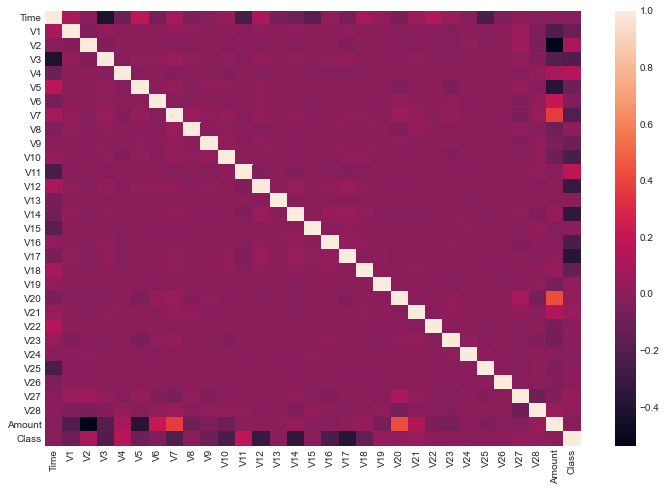

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr()) # Heatmap of correlation between columns of ‘df’.

In [24]:
#Linear Outlier Factor & Isolation Forest.

fraud = df[df['Class'] == 1] # Number of fraudulent transactions
valid = df[df['Class'] == 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))

In [26]:
X = df.drop('Class',axis = 1) # X is input
y = df['Class'] # y is output

In [27]:
#Performance of Local Outlier Factor model.

a = LocalOutlierFactor(n_neighbors = 20,contamination = outlier_fraction)
y_prediction1 = a.fit_predict(X) # Fitting the model.
y_prediction1[y_prediction1 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction1[y_prediction1 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors1 = (y_prediction1 != y).sum() # Total number of errors is calculated.
print(errors1)
print(accuracy_score(y_prediction1,y))
print(classification_report(y_prediction1,y))

117
0.9958919981742214
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28421
           1       0.02      0.02      0.02        60

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



In [28]:
#Performance of Isolation Forest
b = IsolationForest(max_samples = len(X),contamination = outlier_fraction).fit(X) # Fitting the model.
y_prediction2 = b.predict(X) # Prediction using trained model.
y_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors2 = (y_prediction2 != y).sum() # Total number of errors is calculated.
print(errors2)
print(accuracy_score(y_prediction2,y))
print(classification_report(y_prediction2,y))

81
0.9971559987359995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28421
           1       0.32      0.32      0.32        60

    accuracy                           1.00     28481
   macro avg       0.66      0.66      0.66     28481
weighted avg       1.00      1.00      1.00     28481



In [ ]:
#Isolation forest is a better anomaly detection algorithm than Local outlier factor, as we can see in the above results.